In [1]:
import math
from os.path import join

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
split_path = '/content/drive/MyDrive/Colab Notebooks/data/207_project/'
processed_df = pd.read_csv(split_path + 'hotel_bookings_processed.csv')

In [3]:
processed_df.count()

,0
is_canceled,119388
lead_time,119388
arrival_date_month,119388
stays_in_weekend_nights,119388
stays_in_week_nights,119388
adults,119388
children,119388
babies,119388
is_repeated_guest,119388
previous_cancellations,119388


In [4]:
# Undo one-hot encoding for visualization
df = processed_df.copy()
prefixes = ['customer_type','deposit_type','distribution_channel','hotel','market_segment','meal','continent']
for prefix in prefixes:
    cols = [col for col in df.columns if col.startswith(prefix + "_")]

    if cols:
        df[prefix] = df[cols].idxmax(axis=1).str[len(prefix) + 1:]
        df.drop(columns=cols, inplace=True)

In [5]:
df.head(10)

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,required_car_parking_spaces,total_of_special_requests,is_reserved_room_type,customer_type,deposit_type,distribution_channel,hotel,market_segment,meal,continent
0,0,342,7,0,0,2,0.0,0,0,0,...,0,0,1,transient,no_deposit,direct,resort_hotel,direct,bb,europe
1,0,737,7,0,0,2,0.0,0,0,0,...,0,0,1,transient,no_deposit,direct,resort_hotel,direct,bb,europe
2,0,7,7,0,1,1,0.0,0,0,0,...,0,0,0,transient,no_deposit,direct,resort_hotel,direct,bb,europe
3,0,13,7,0,1,1,0.0,0,0,0,...,0,0,1,transient,no_deposit,corporate,resort_hotel,corporate,bb,europe
4,0,14,7,0,2,2,0.0,0,0,0,...,0,1,1,transient,no_deposit,ta_to,resort_hotel,online_ta,bb,europe
5,0,14,7,0,2,2,0.0,0,0,0,...,0,1,1,transient,no_deposit,ta_to,resort_hotel,online_ta,bb,europe
6,0,0,7,0,2,2,0.0,0,0,0,...,0,0,1,transient,no_deposit,direct,resort_hotel,direct,bb,europe
7,0,9,7,0,2,2,0.0,0,0,0,...,0,1,1,transient,no_deposit,direct,resort_hotel,direct,fb,europe
8,1,85,7,0,3,2,0.0,0,0,0,...,0,1,1,transient,no_deposit,ta_to,resort_hotel,online_ta,bb,europe
9,1,75,7,0,3,2,0.0,0,0,0,...,0,0,1,transient,no_deposit,ta_to,resort_hotel,offline_ta_to,hb,europe


### List of Most Common Values for Each Column

In [6]:
print("Most common values:\n")
for col in df.columns:
  values = df[col].value_counts(normalize=True) * 100
  common_value = values.index[0]
  highest_pct = values.iloc[0]
  print(f"{col}: {common_value} ({highest_pct:.2f}%)")

Most common values:

is_canceled: 0 (62.96%)
lead_time: 0 (5.31%)
arrival_date_month: 8 (11.62%)
stays_in_weekend_nights: 0 (43.55%)
stays_in_week_nights: 2 (28.21%)
adults: 2 (75.11%)
children: 0.0 (92.80%)
babies: 0 (99.23%)
is_repeated_guest: 0 (96.81%)
previous_cancellations: 0 (94.57%)
previous_bookings_not_canceled: 0 (96.97%)
booking_changes: 0 (84.86%)
agent: 1 (86.31%)
company: 0 (94.31%)
days_in_waiting_list: 0 (96.90%)
adr: 62.0 (3.14%)
required_car_parking_spaces: 0 (93.79%)
total_of_special_requests: 0 (58.90%)
is_reserved_room_type: 1 (87.51%)
customer_type: transient (75.06%)
deposit_type: no_deposit (87.65%)
distribution_channel: ta_to (81.98%)
hotel: city_hotel (66.45%)
market_segment: online_ta (47.31%)
meal: bb (77.32%)
continent: europe (90.31%)


# Visualizations

### Cancellations by Month

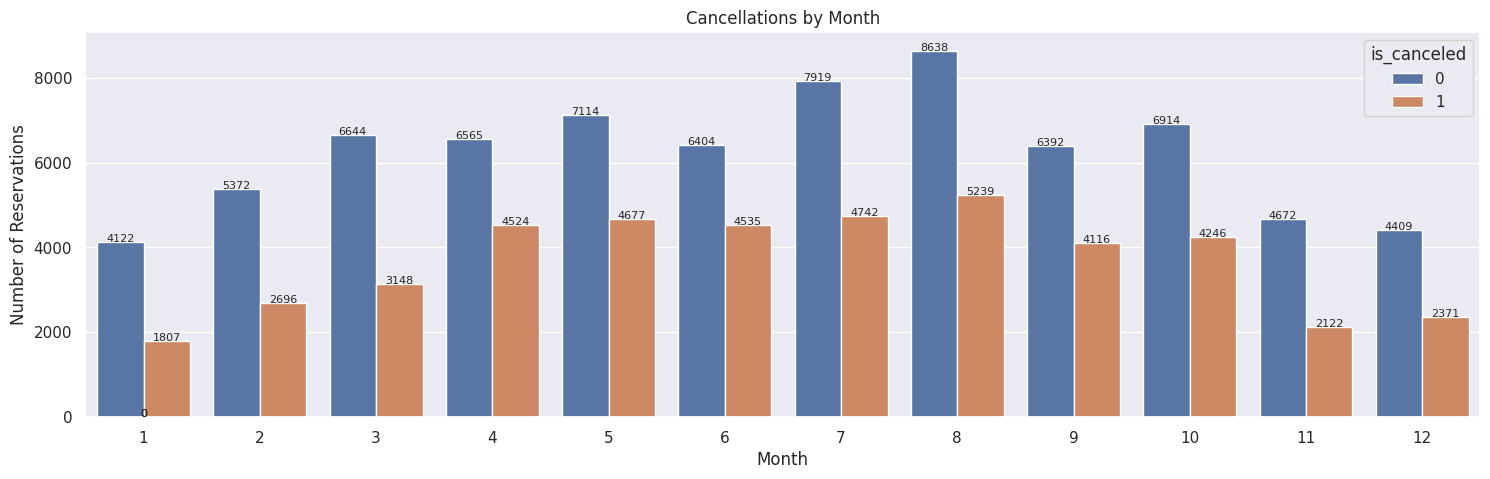

In [7]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x='arrival_date_month',
                   data=df,
                   hue='is_canceled')

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            fontsize=8)

# Add title/axes
plt.title('Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Reservations')
plt.show()

### Cancellation % by Month

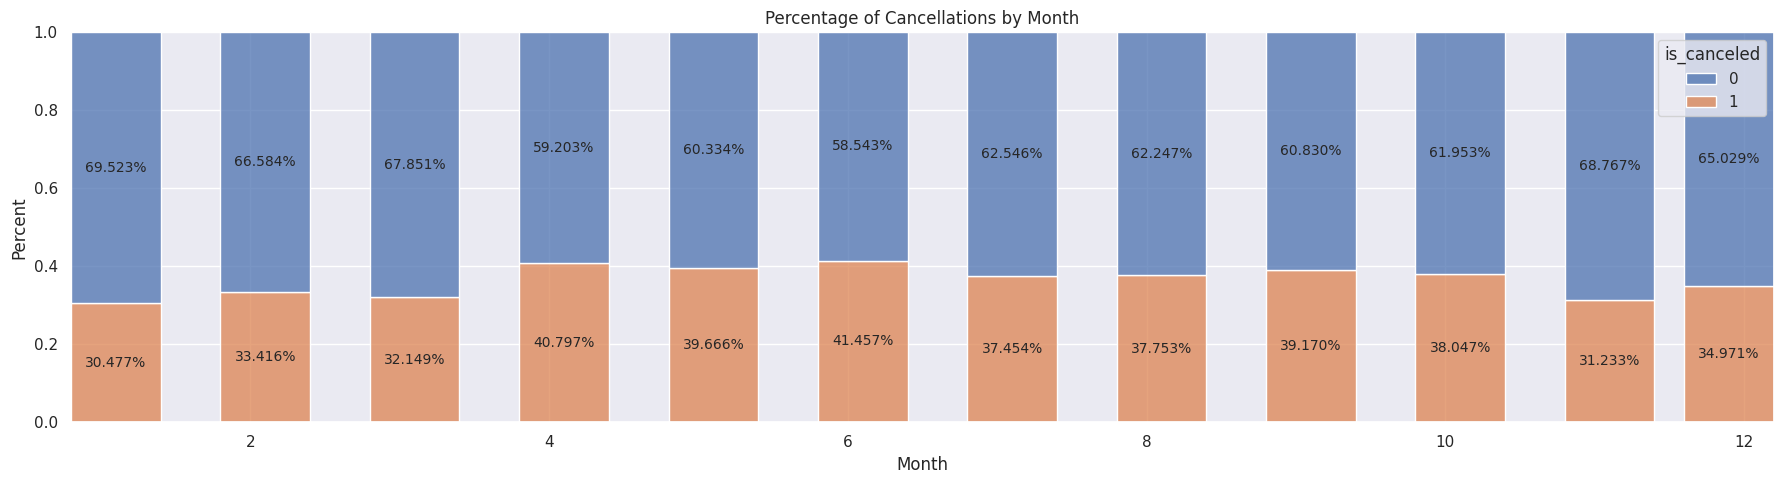

In [8]:
plt.figure(figsize=(18, 5))
ax = sns.histplot(
    x='arrival_date_month',
    data=df,
    hue='is_canceled',
    multiple='fill',
    shrink=3
)

# Add labels
for container in ax.containers:
    labels = [f'{h * 100:.3f}%' for h in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10)

# Add title/axes
plt.title('Percentage of Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Percent')
plt.tight_layout()
plt.show()

### Cancellations vs ADR

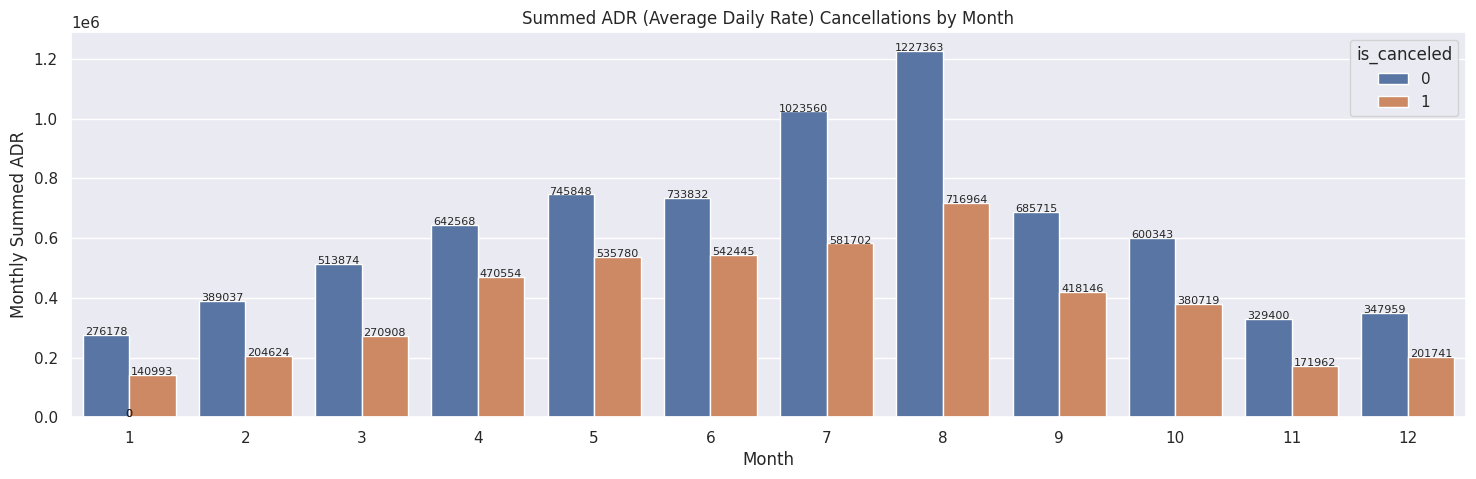

In [9]:
plt.figure(figsize=(18, 5))
ax = sns.barplot(x='arrival_date_month', y='adr', data=df.groupby(['arrival_date_month','is_canceled'])[['adr']].sum().reset_index(), hue='is_canceled')

# Add labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            fontsize=8)


# Add title/axes
plt.title('Summed ADR (Average Daily Rate) Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Monthly Summed ADR')
plt.show()

### Cancellations for Each Category

In [10]:
# Object data type columns
df.select_dtypes(include='object').columns

Index(['customer_type', 'deposit_type', 'distribution_channel', 'hotel',
       'market_segment', 'meal', 'continent'],
      dtype='object')

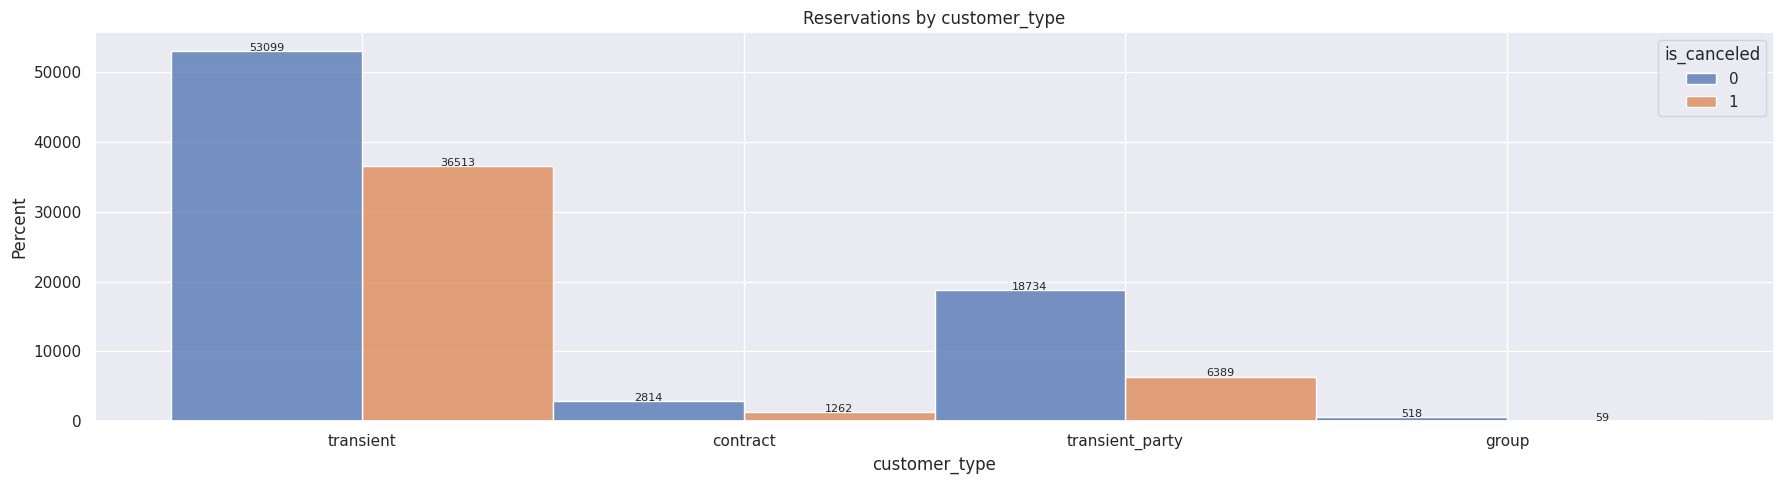

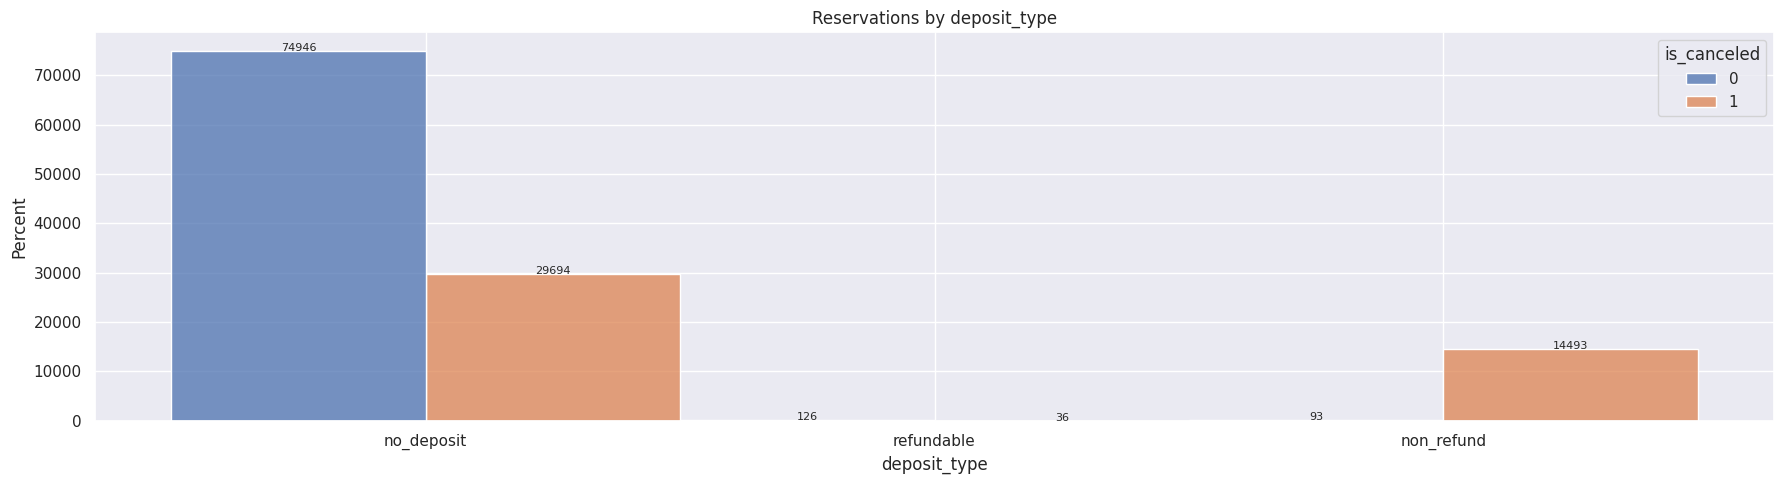

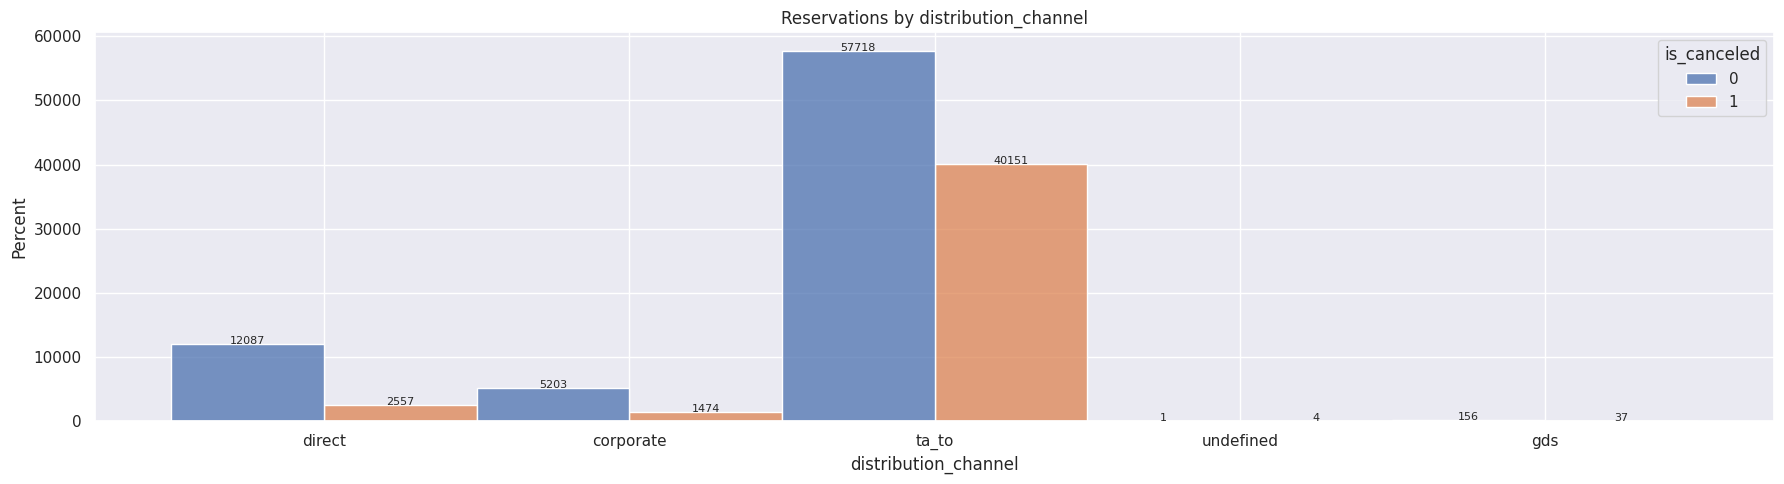

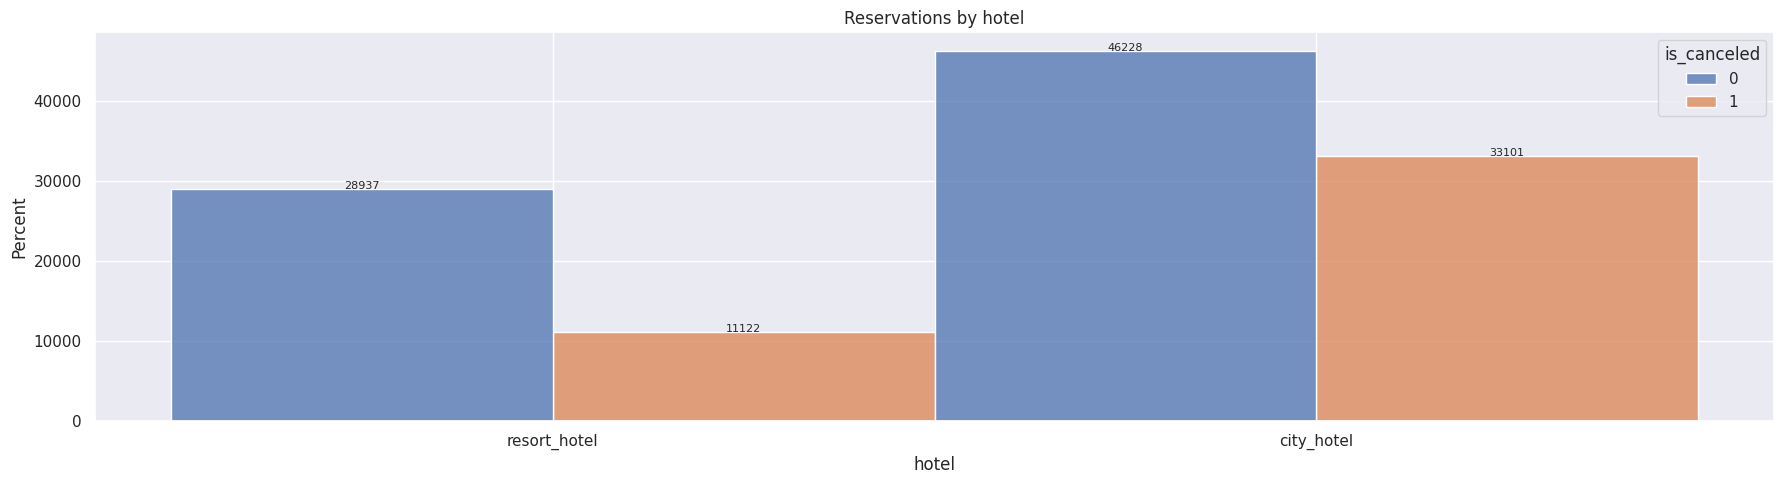

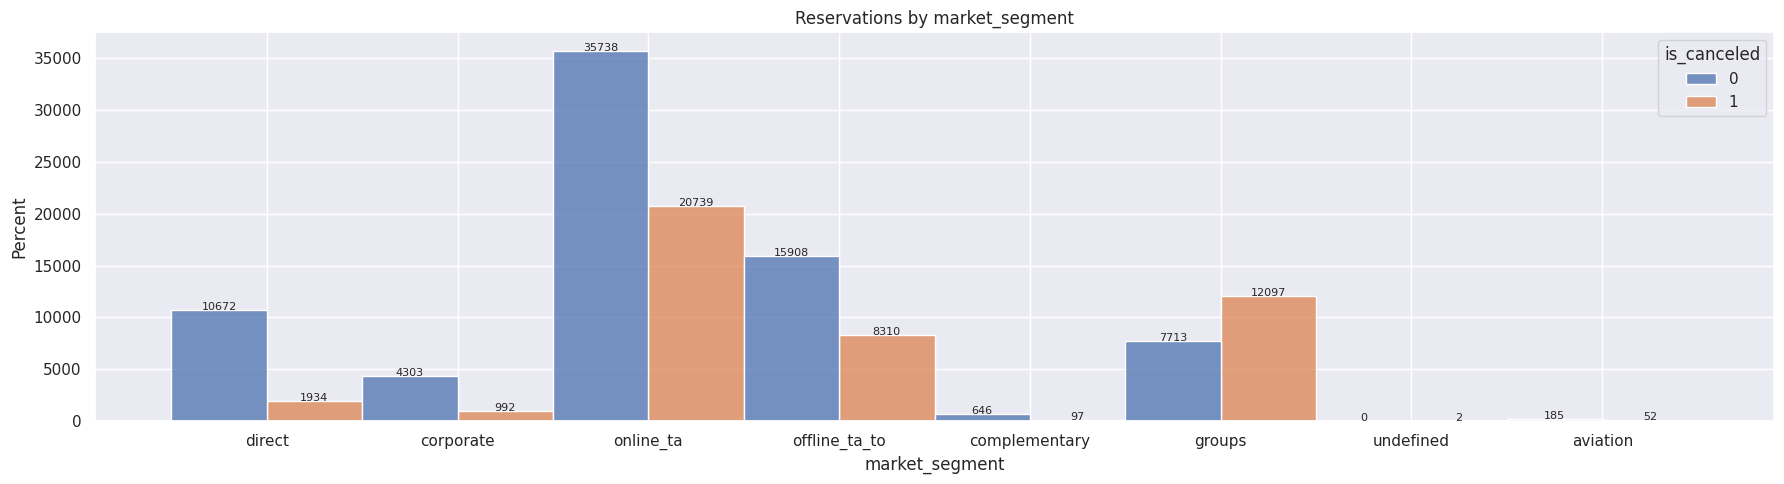

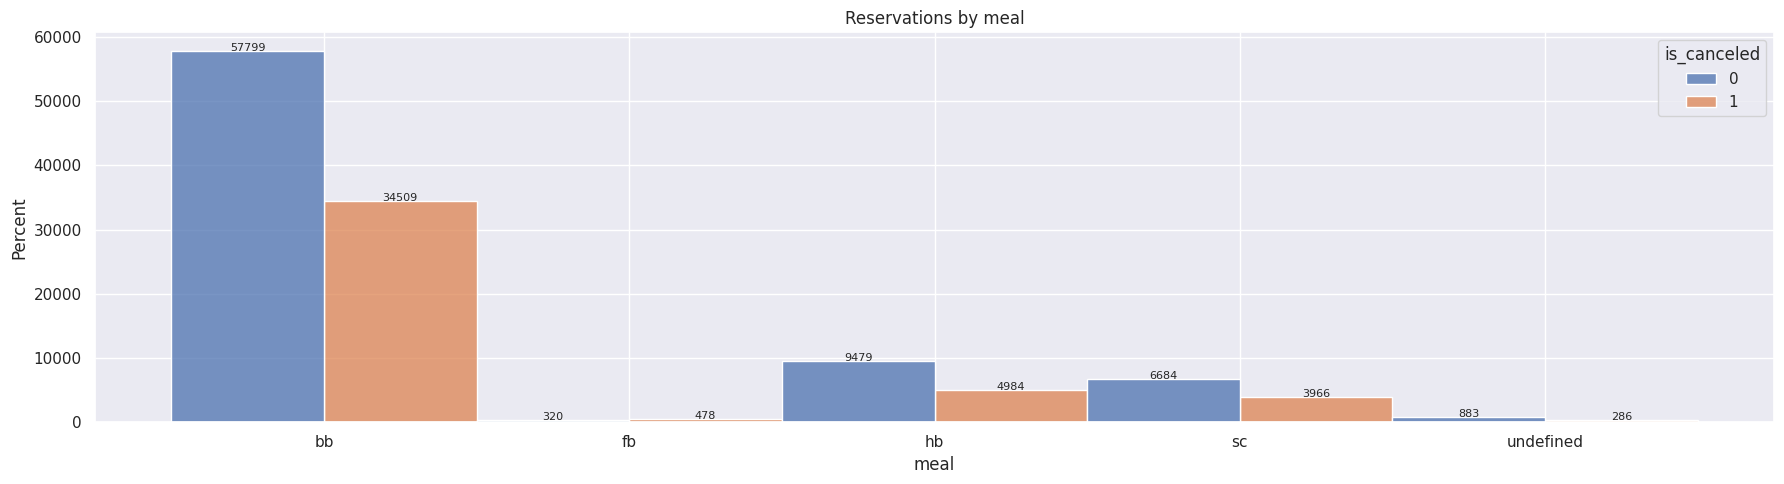

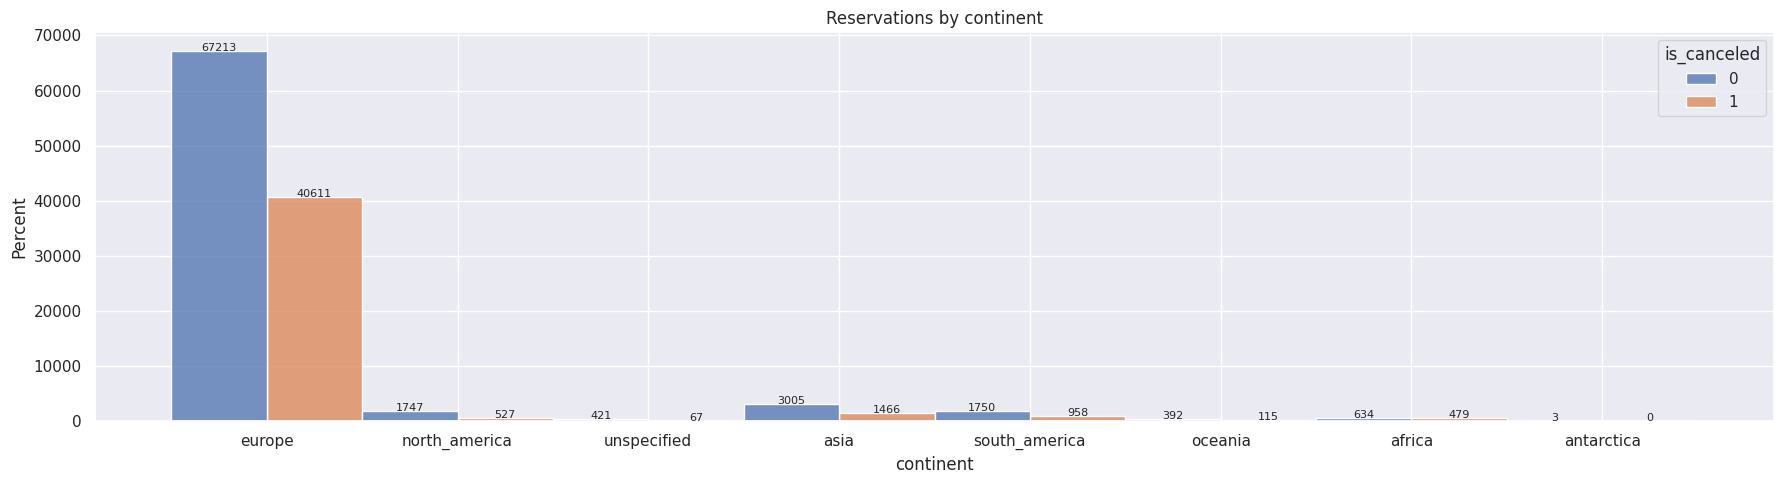

In [11]:
for col in df.select_dtypes(include='object').columns:
  plt.figure(figsize=(18, 5))
  ax = sns.histplot(
      x=col,
      data=df,
      hue='is_canceled',
      multiple='dodge'
  )

  # Add labels
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + 0.5,
            f'{int(height)}',
            ha='center',
            fontsize=8)

  # Add title/axes
  plt.title(f'Reservations by {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Percent')
  plt.tight_layout()
  plt.show()

### Percentage of Cancellations for Each Category

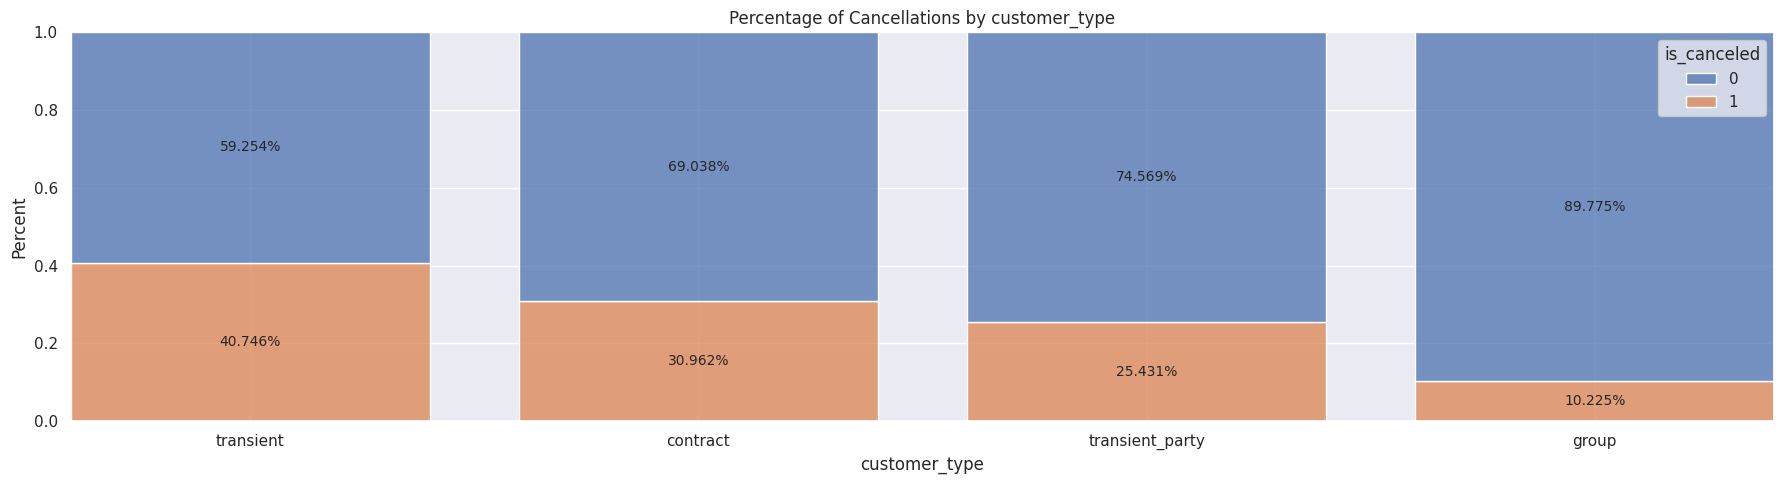

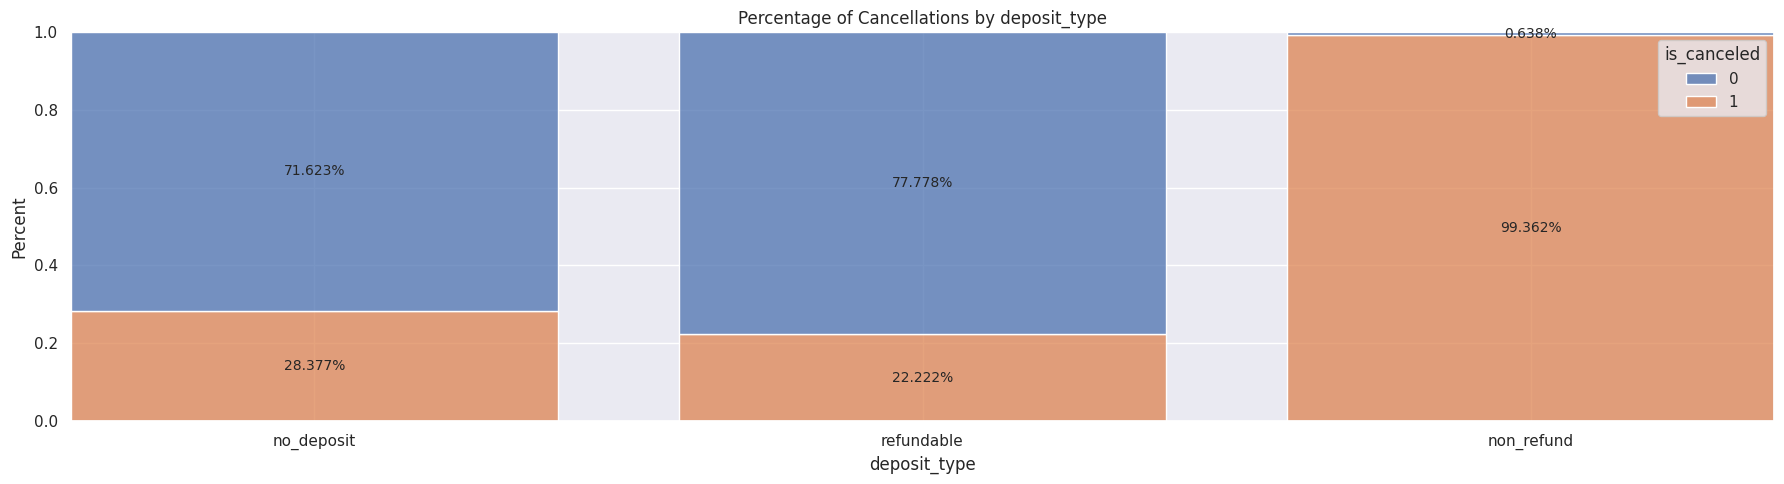

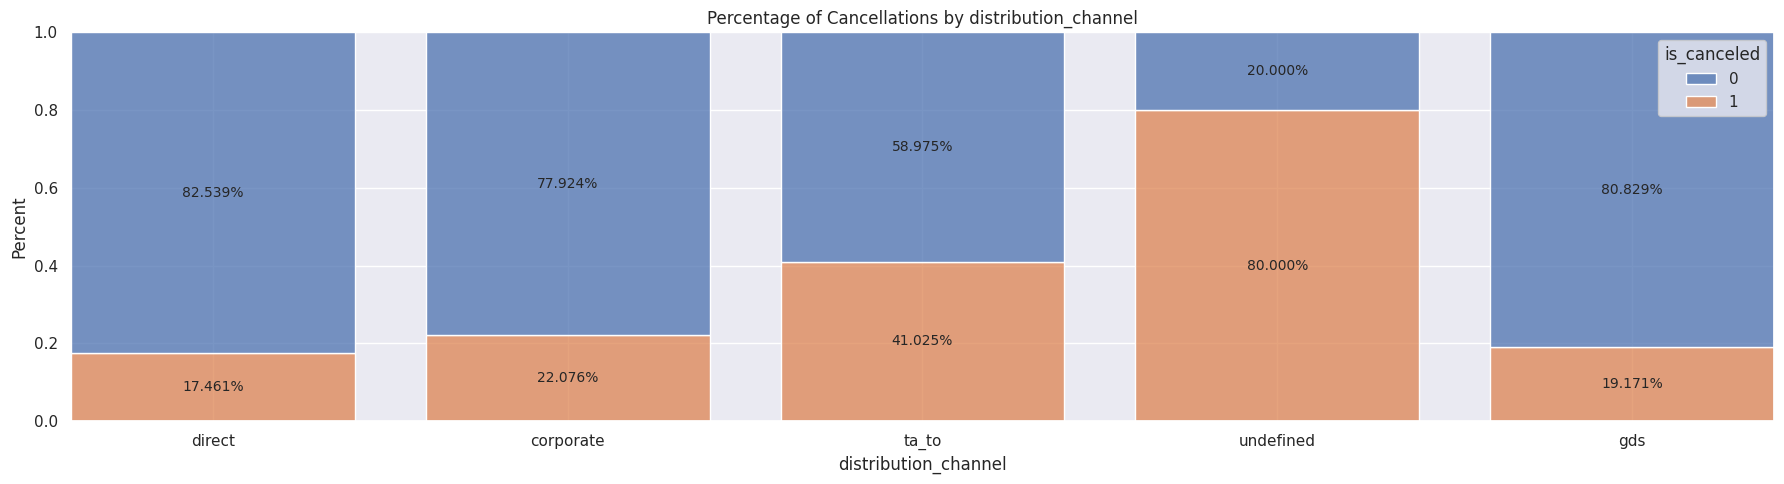

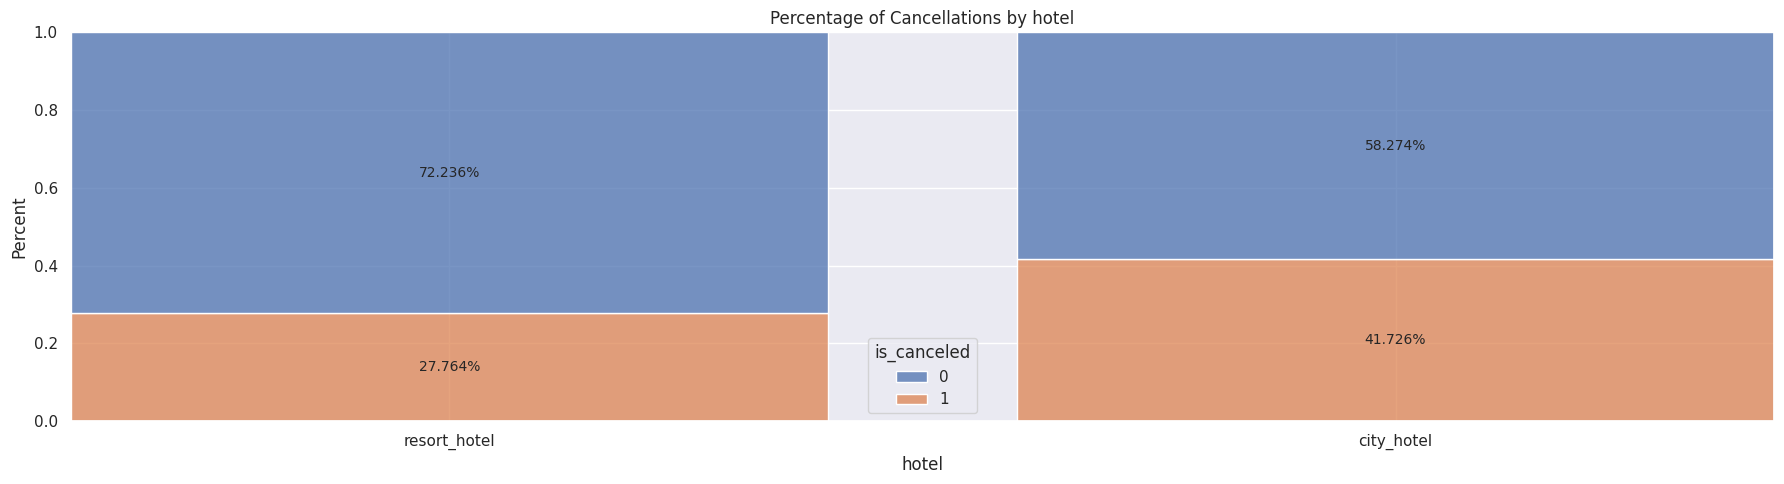

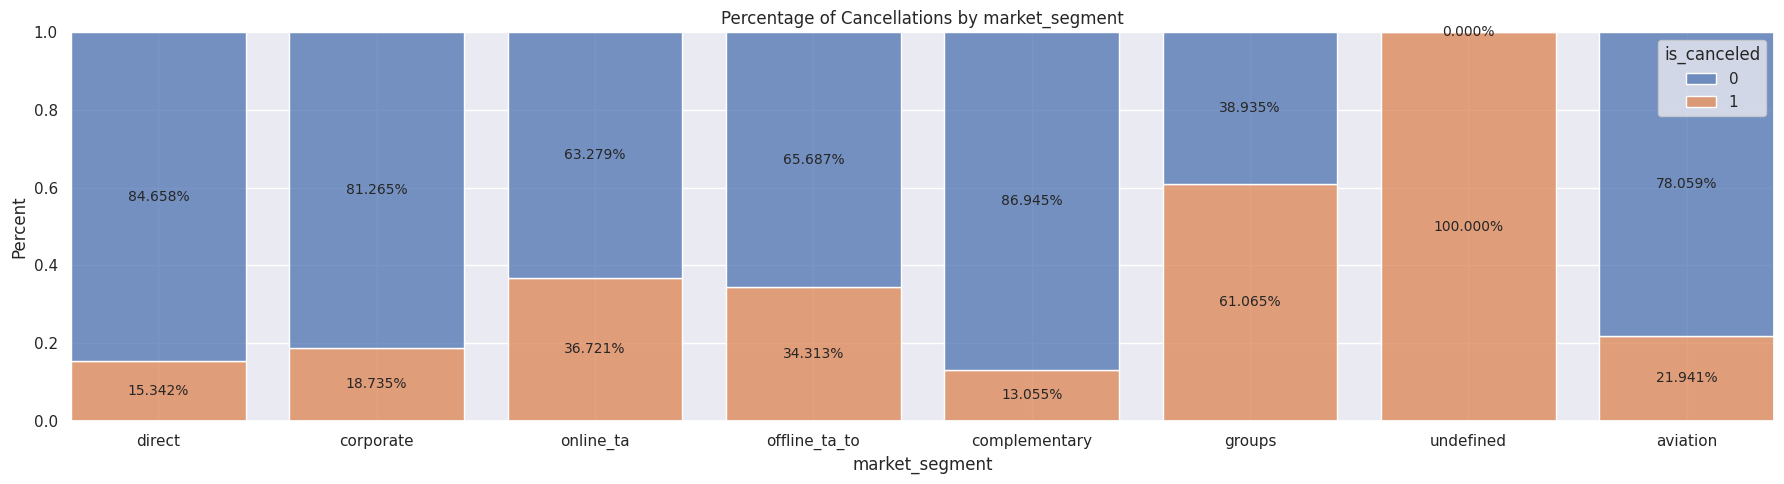

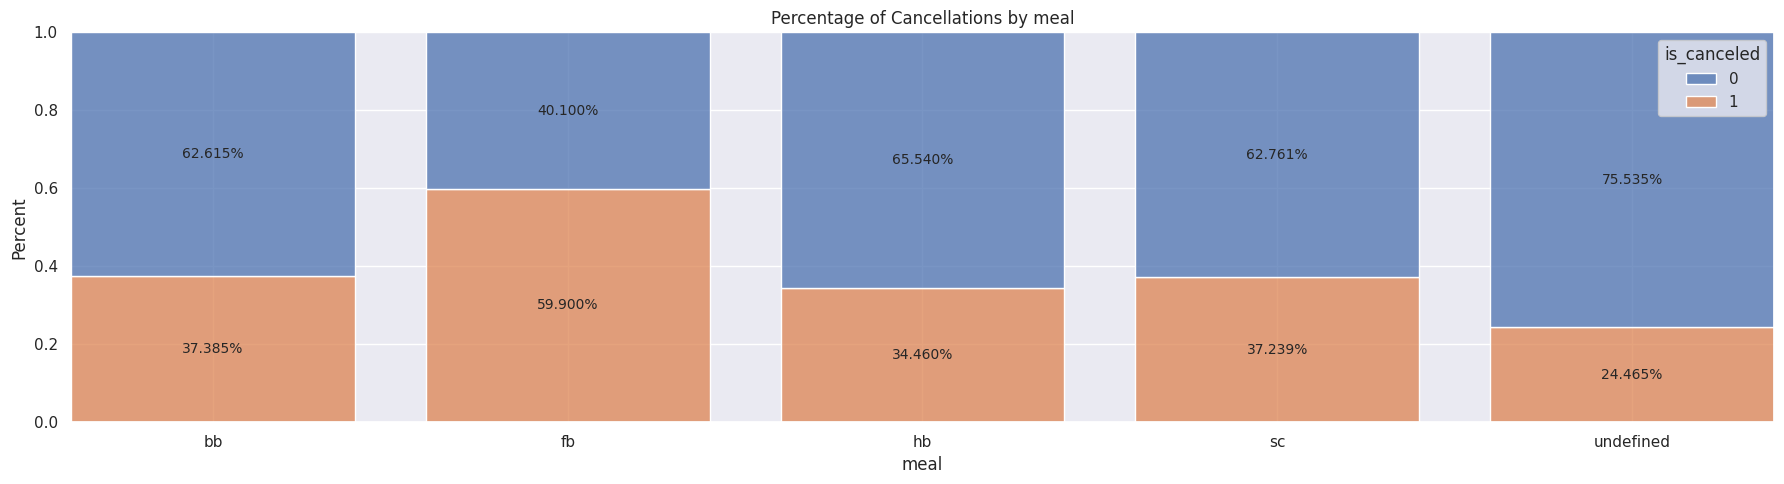

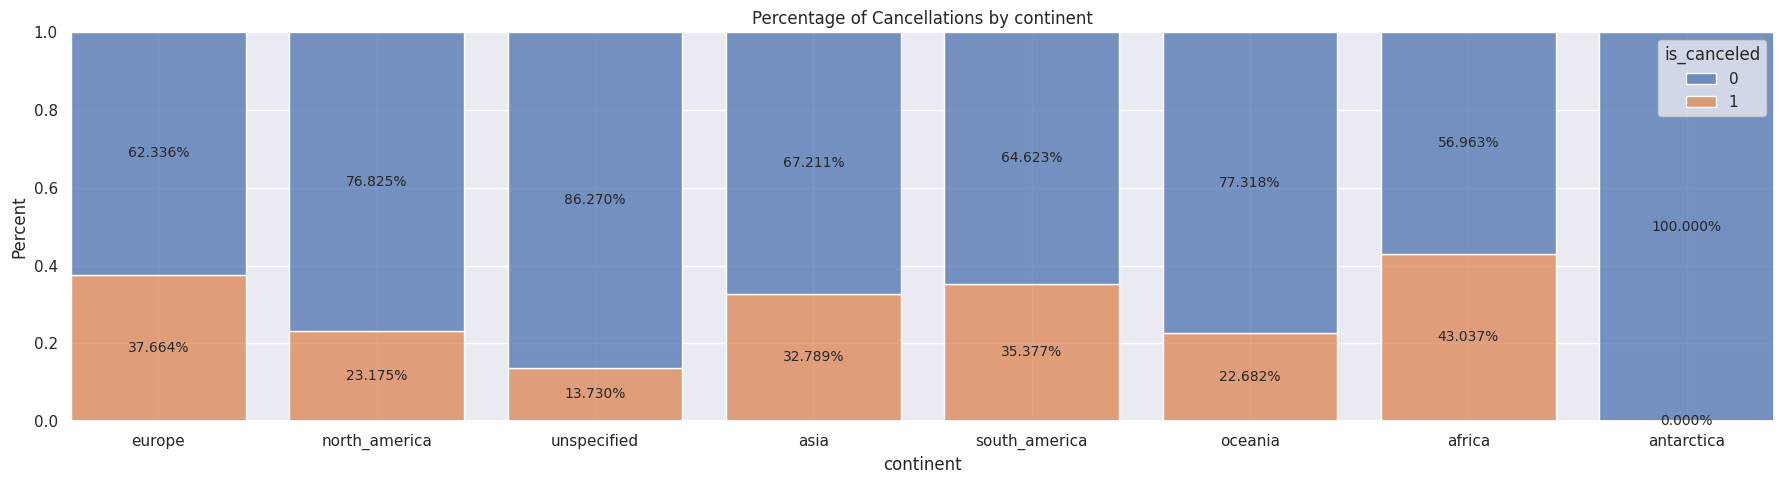

In [12]:
for col in df.select_dtypes(include='object').columns:
  plt.figure(figsize=(18, 5))
  ax = sns.histplot(
      x=col,
      data=df,
      hue='is_canceled',
      multiple='fill',
      shrink=0.8
  )

  # Add labels
  for container in ax.containers:
      labels = [f'{h * 100:.3f}%' for h in container.datavalues]
      ax.bar_label(container, labels=labels, label_type='center', fontsize=10)


  # Add title/axes
  plt.title(f'Percentage of Cancellations by {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Percent')
  plt.tight_layout()
  plt.show()

### Distribution of Each Column

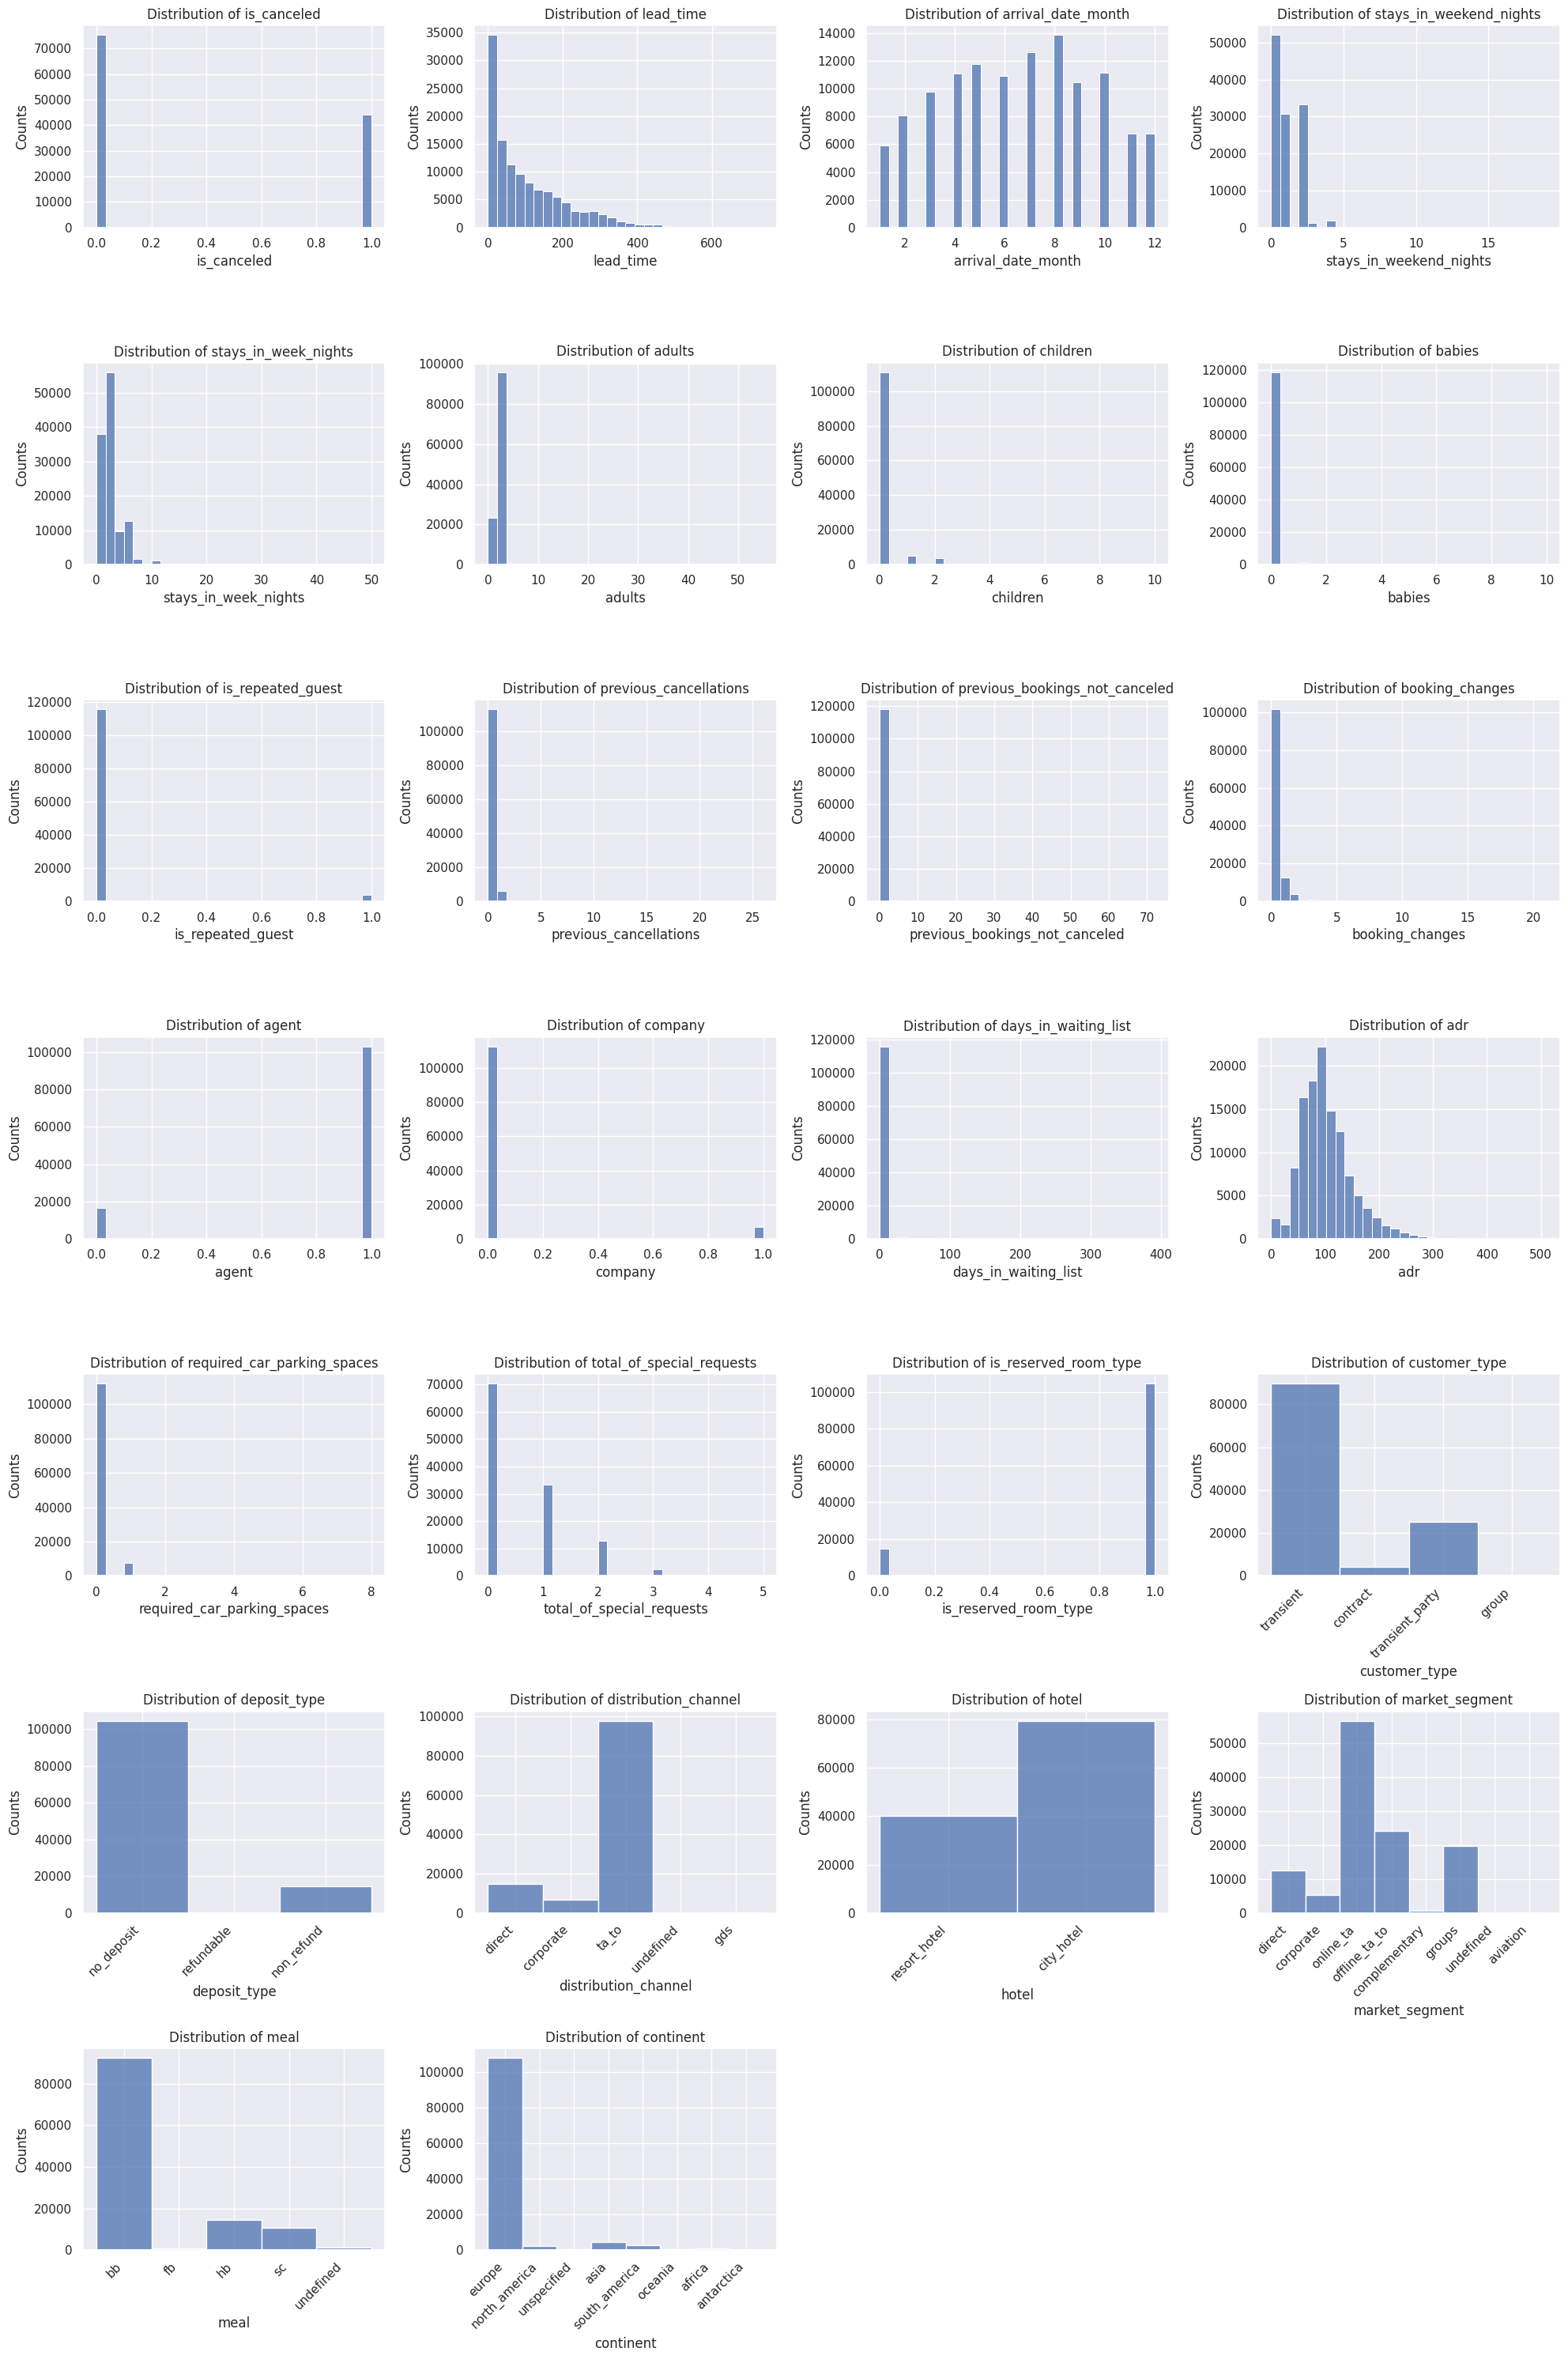

In [13]:
fig, axes = plt.subplots(7, 4, figsize=(20, 30))
axes = axes.flatten()

# Create subplot for each column
for row, col in enumerate(df.columns):
  sns.histplot(df[col], ax=axes[row], bins=30)
  axes[row].set_title(f"Distribution of {col}")
  axes[row].set_xlabel(f"{col}")
  axes[row].set_ylabel("Counts")
  if df[col].dtype == 'object':
    plt.setp(axes[row].get_xticklabels(), rotation=45, ha='right')

for i in range(len(df.columns), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Log Transformation of ADR, Lead Time, and Days in Waiting List

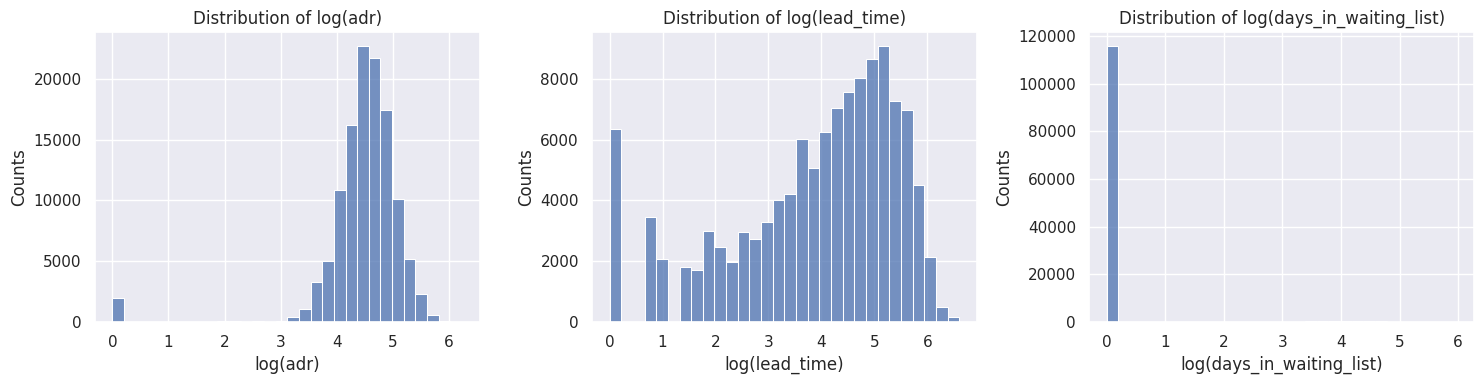

In [14]:
log_cols = ['adr', 'lead_time', 'days_in_waiting_list']
log_df = df[log_cols].apply(lambda x: np.log1p(x))
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()

# Create subplot for each column
for row, col in enumerate(log_df):
  sns.histplot(log_df[col], ax=axes[row], bins=30)
  axes[row].set_title(f"Distribution of log({col})")
  axes[row].set_xlabel(f"log({col})")
  axes[row].set_ylabel("Counts")

plt.tight_layout()
plt.show()

### Boxplot Distributions of Non-Categorical Columns

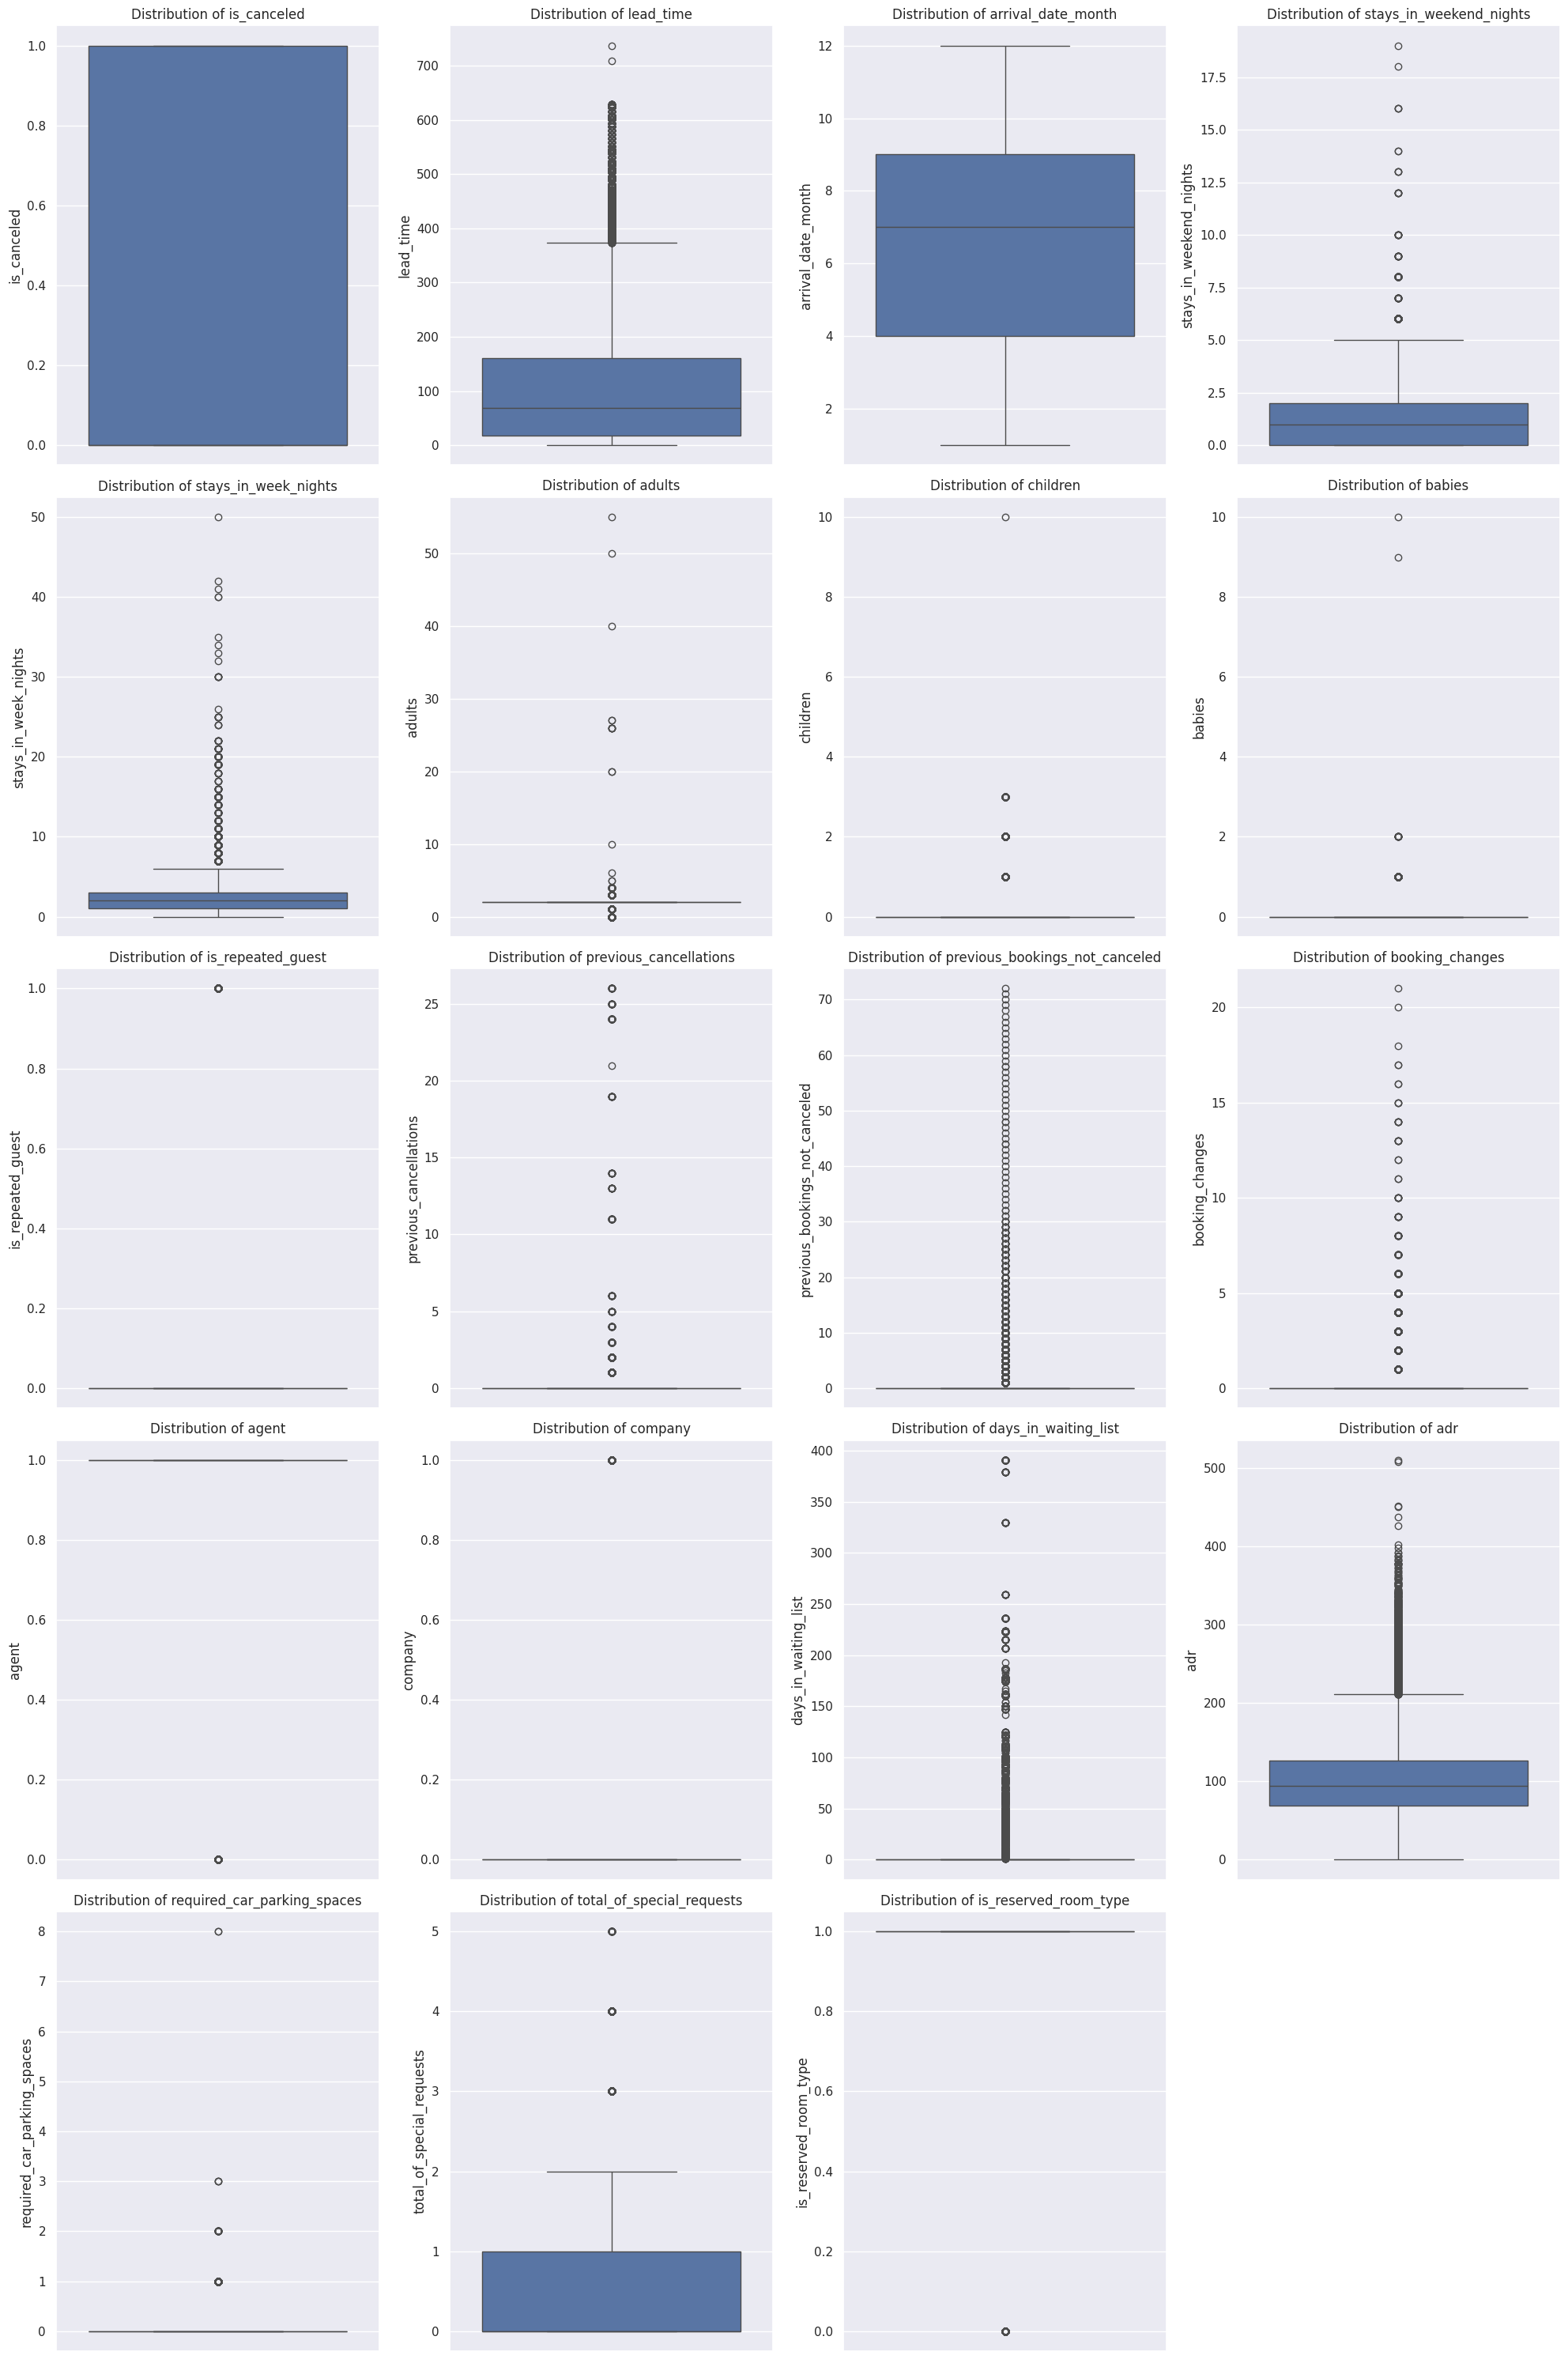

In [15]:
fig, axes = plt.subplots(5, 4, figsize=(20, 30))
axes = axes.flatten()

# Create subplot for each column
for row, col in enumerate(df.select_dtypes(exclude='object').columns):
  sns.boxplot(df[col], ax=axes[row])
  axes[row].set_title(f"Distribution of {col}")
  axes[row].set_ylabel(f"{col}")

for i in range(len(df.select_dtypes(exclude='object').columns), len(axes)):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Correlation Plot of Numerical Features

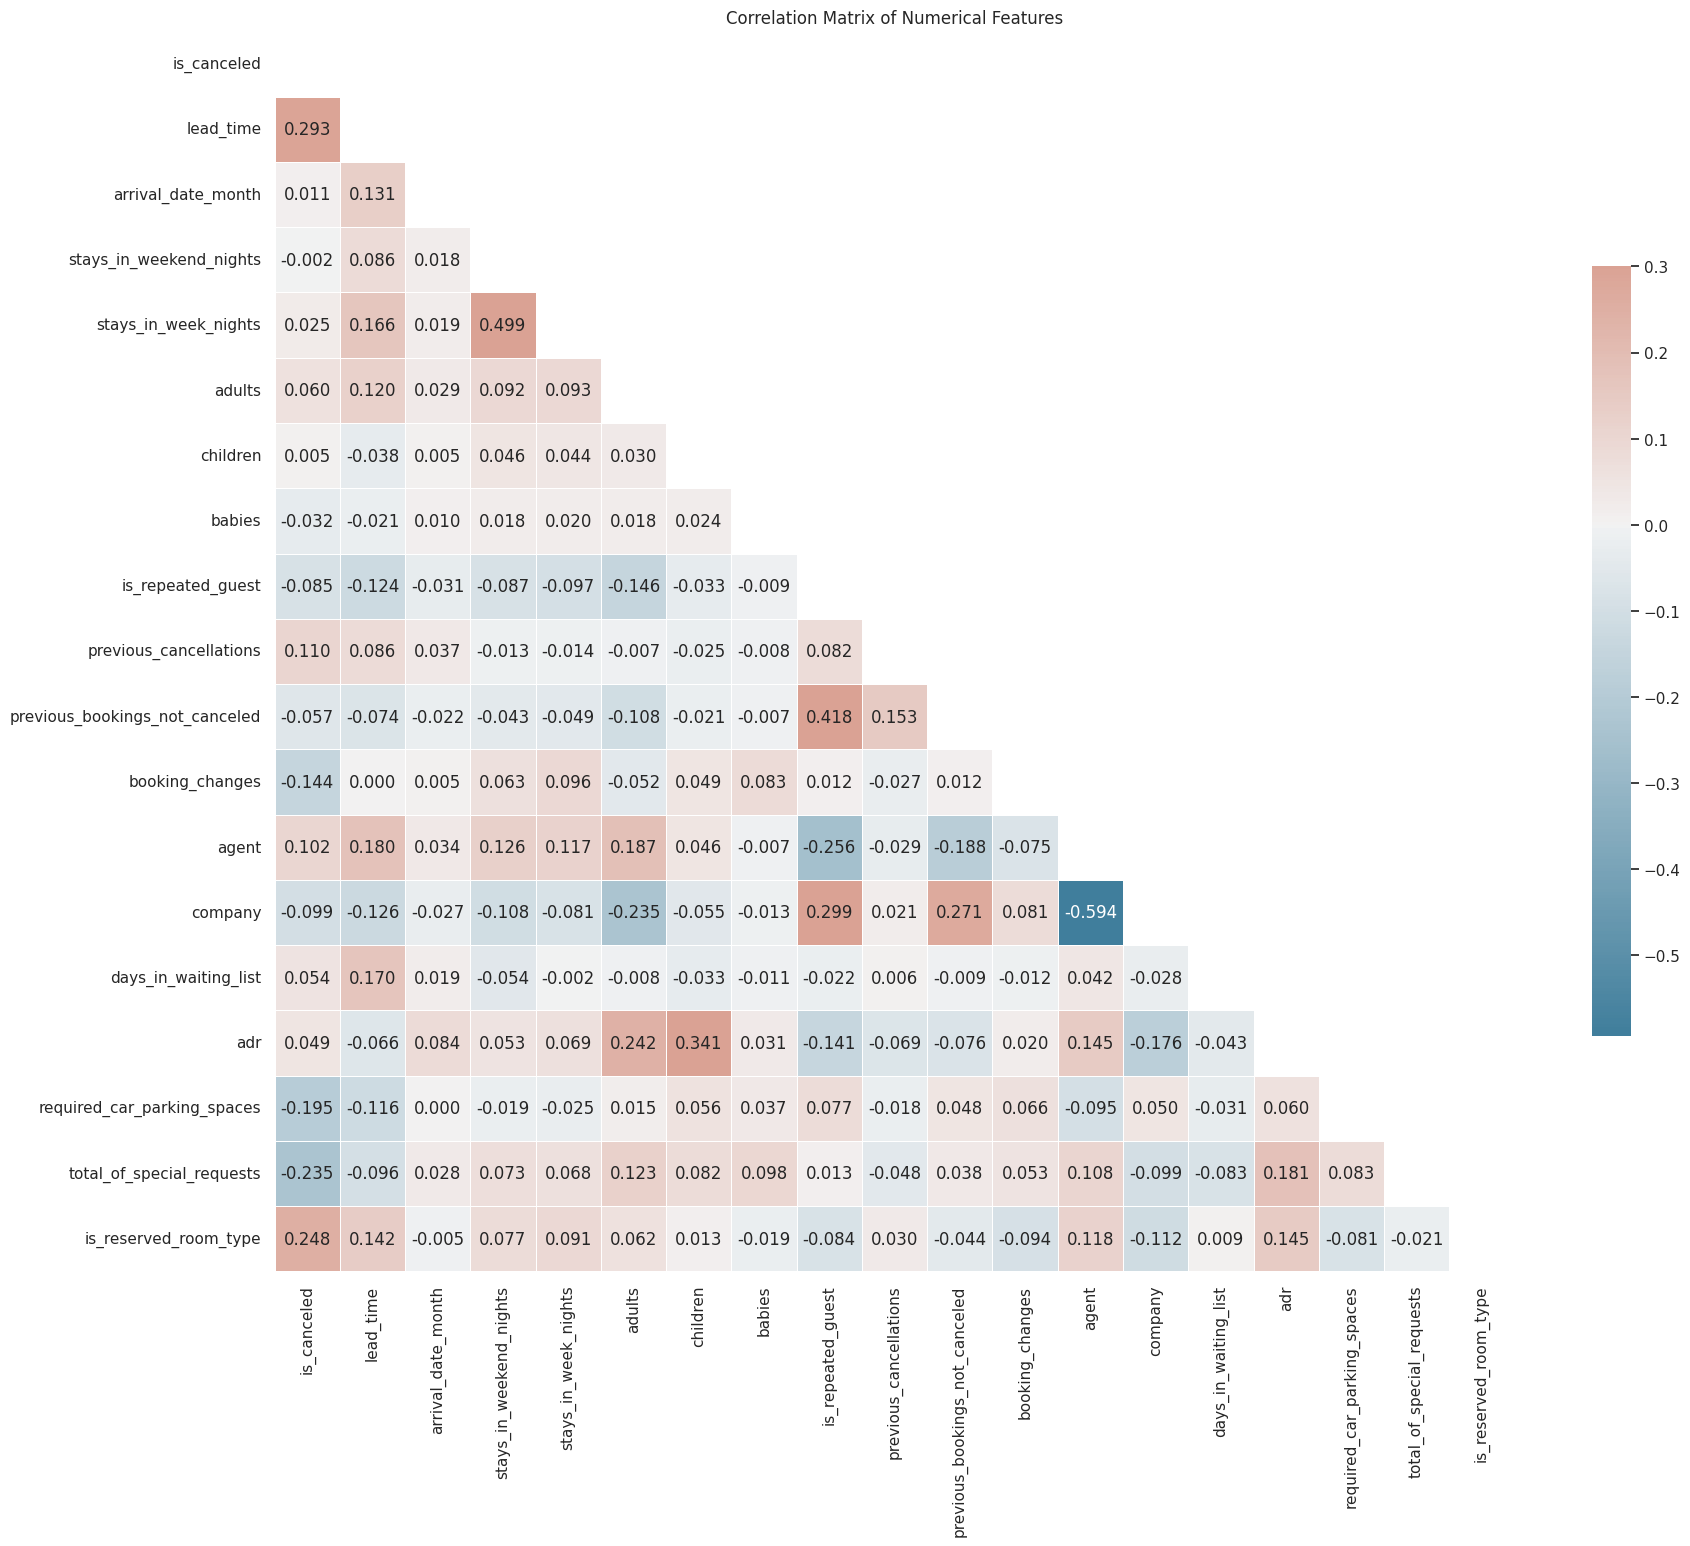

In [16]:
sns.set_theme(style="white")
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_data = df[num_cols]

# Compute the correlation matrix
corr = corr_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".3f", mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Correlation Plot of One-Hot Features

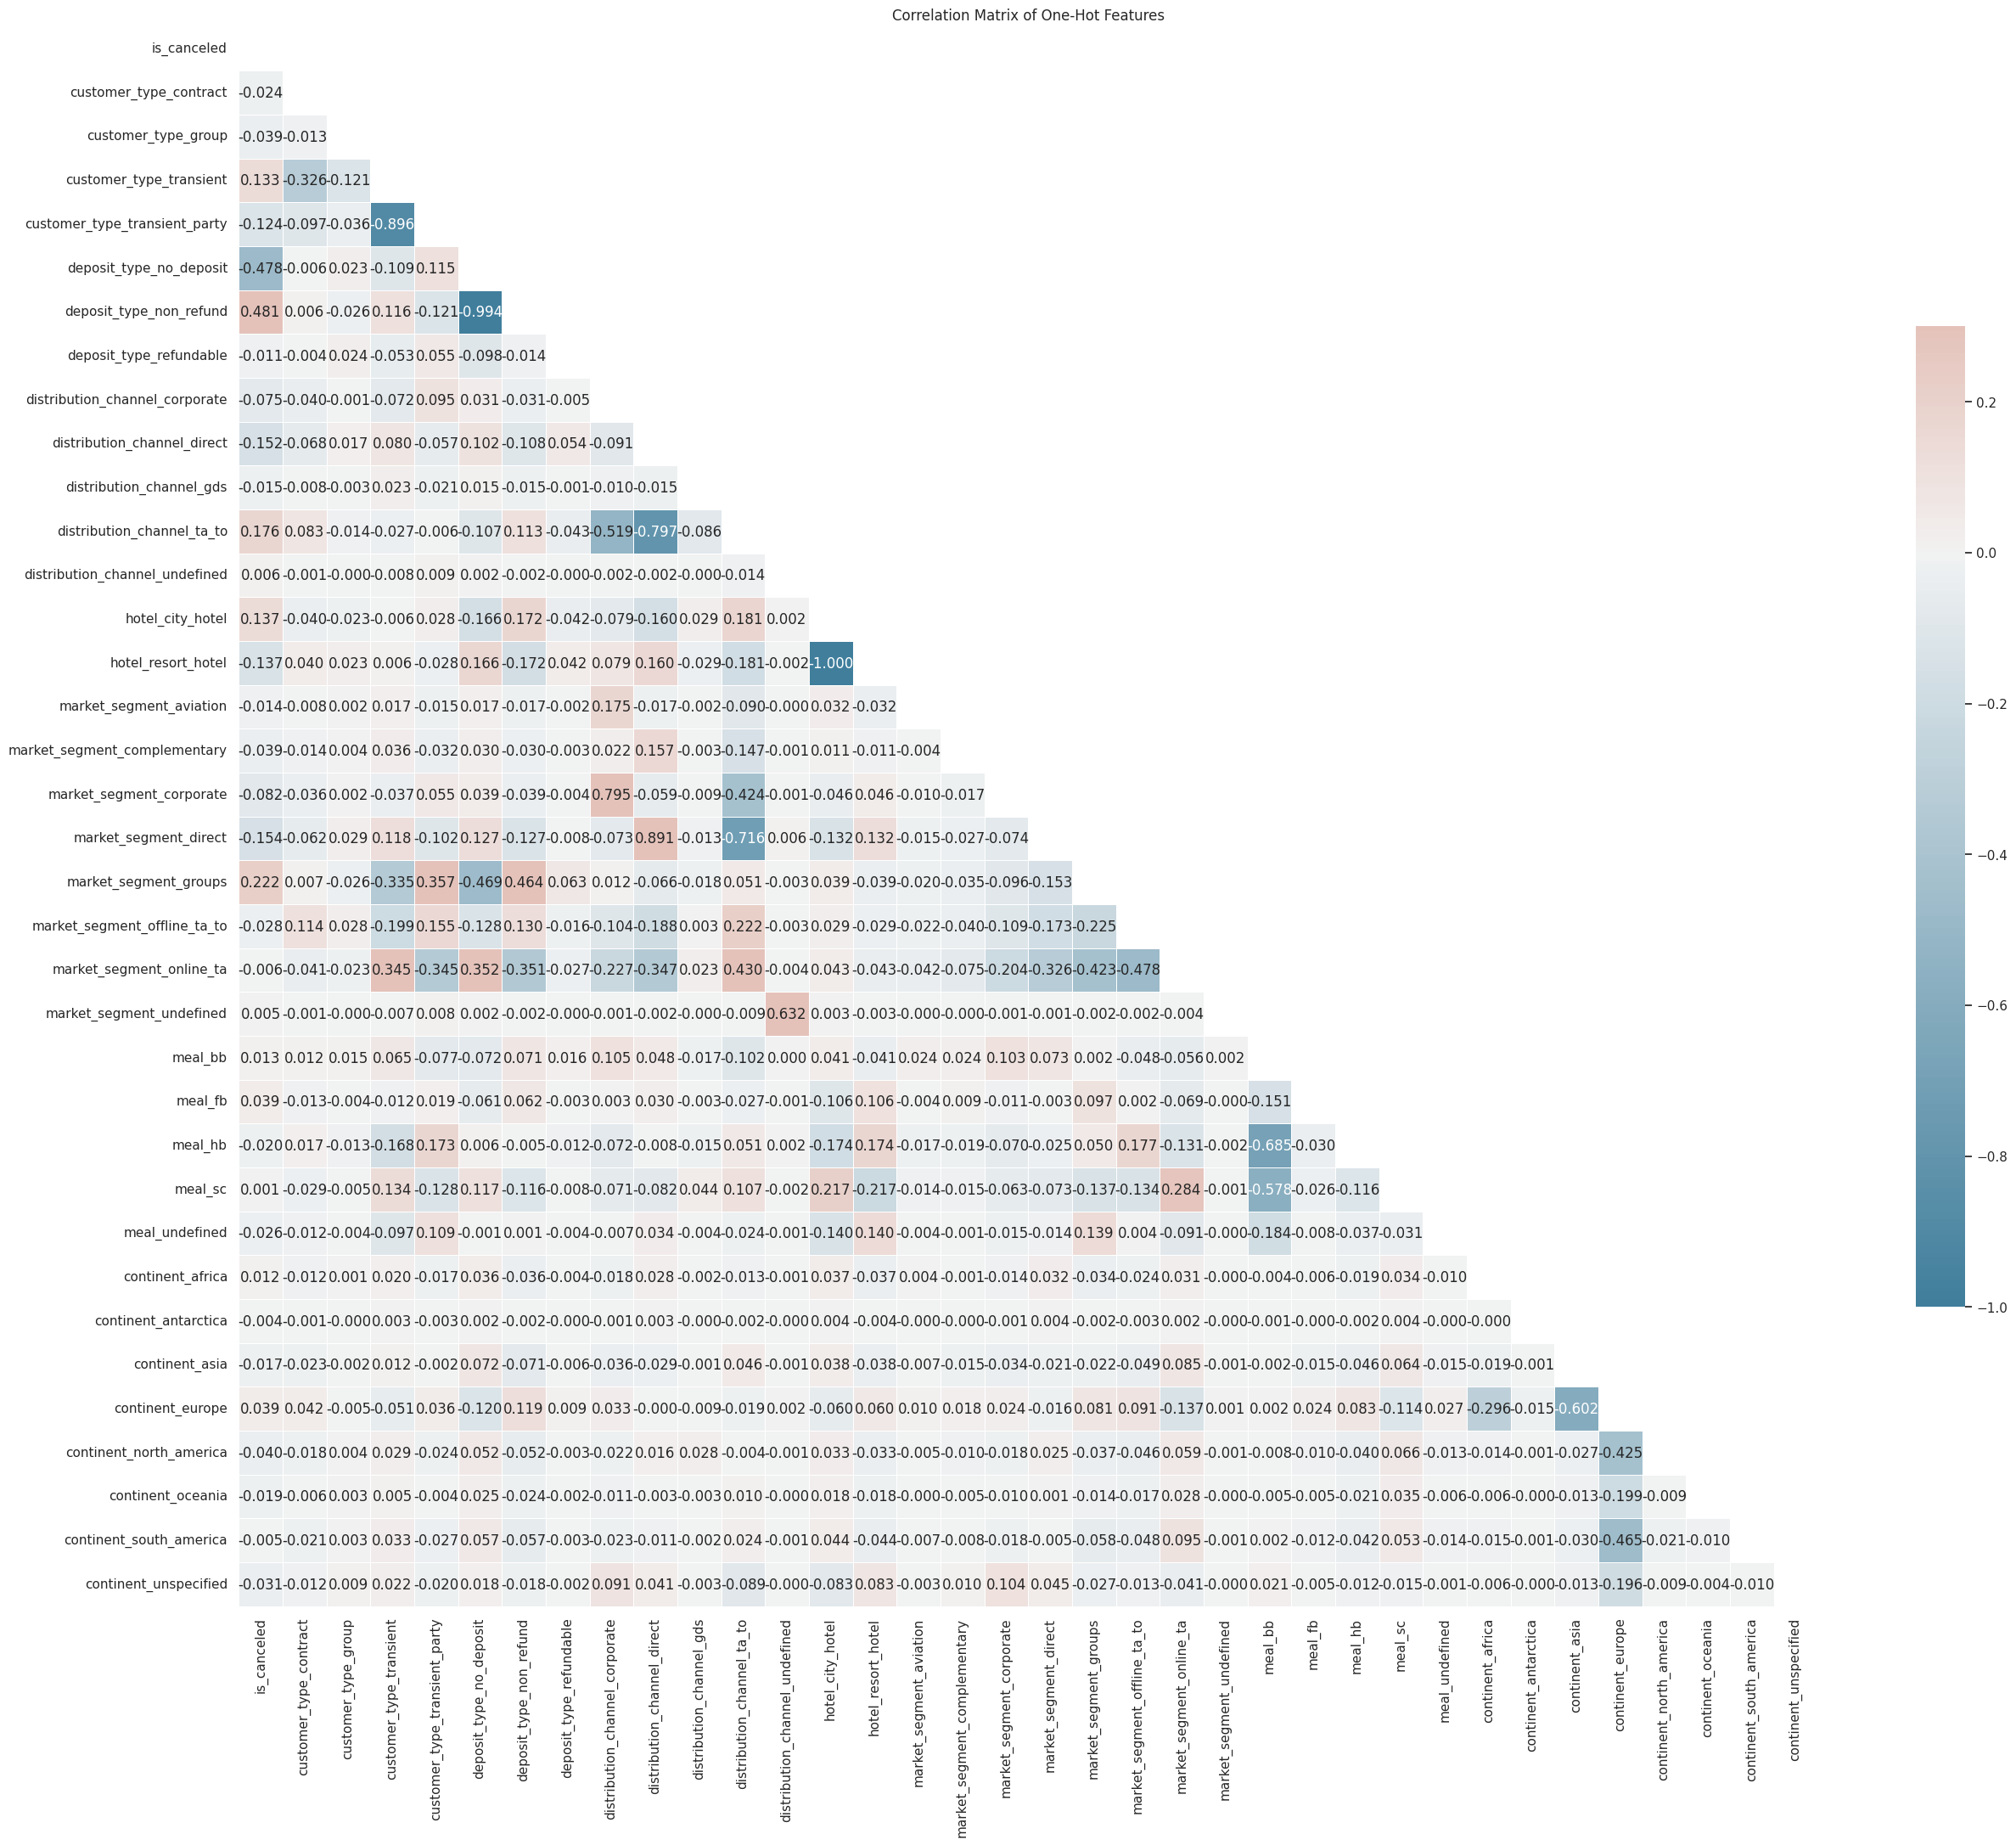

In [17]:
# List of all one-hot features
regexes = ['customer_type', 'deposit_type', 'distribution_channel', 'market_segment', 'meal', 'hotel', 'continent']
cols_to_drop = processed_df.filter(regex='|'.join(regexes)).columns

# Create figure and df
plt.figure(figsize=(30, 30))
df_one_hot = pd.concat([processed_df['is_canceled'], processed_df[cols_to_drop]], axis=1)

# Compute correlation matrix with mask for upper triangle
hm = sns.heatmap(df_one_hot.corr(), annot=True, fmt=".3f", mask=np.triu(np.ones_like(df_one_hot.corr(), dtype=bool)), cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix of One-Hot Features")
plt.show()